In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [4]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\datasets\healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [7]:
df.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.drop('id', axis =1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


Text(0.5, 1.0, 'Percentage of stroke patients')

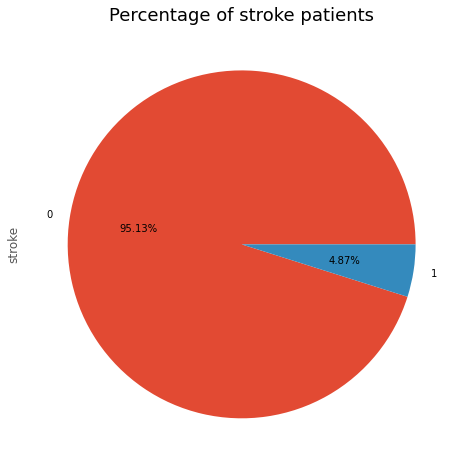

In [11]:
plt.figure(figsize = (18,8))
print(df.stroke.value_counts())
plt.style.use('ggplot')
df['stroke'].value_counts().plot.pie(autopct = "%.2f%%")
plt.title('Percentage of stroke patients', fontsize = 18)

#### The dataset is highly imbalanced.

Text(0.5, 1.0, 'Number of stroke patients per gender')

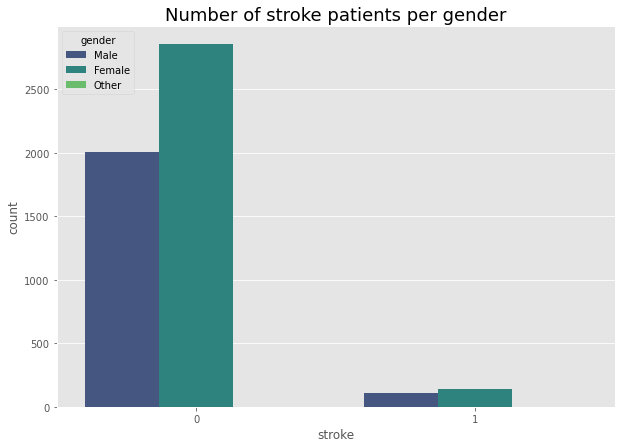

In [12]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'stroke', hue = 'gender', data = df, palette = 'viridis')
plt.title('Number of stroke patients per gender', fontsize = 18)

#### There is a slight difference between female and male stroke patients but there are more women who are stroke-free.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Text(0.5, 1.0, 'Employment status of patients')

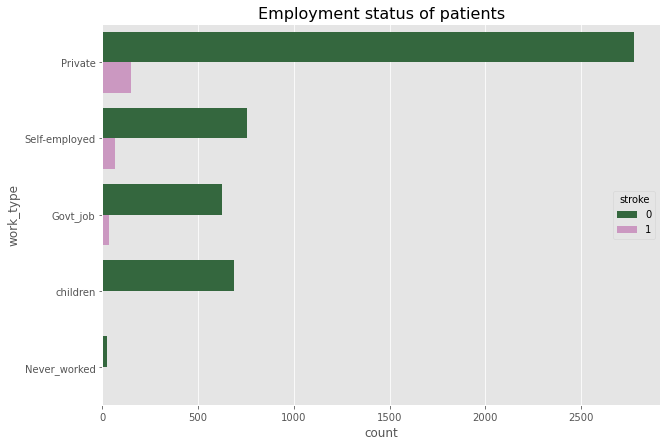

In [13]:
plt.figure(figsize = (10,7))
print(df.work_type.value_counts())
sns.countplot(y = 'work_type', hue = 'stroke', data = df, palette = 'cubehelix')
plt.title('Employment status of patients', fontsize = 16)

#### Most patients are working in private sectors.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:title={'center':'Smoking Status across Gender'}, xlabel='smoking_status', ylabel='count'>

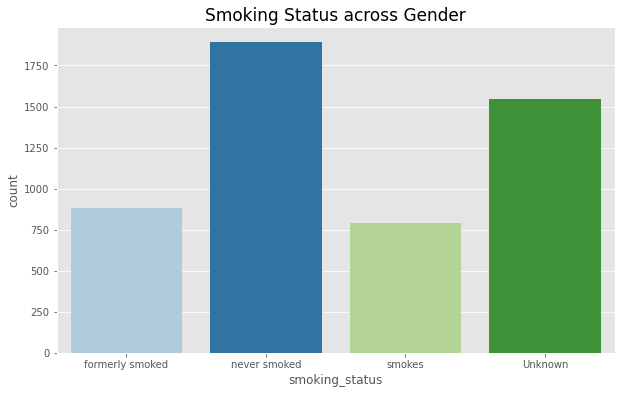

In [14]:
plt.figure(figsize = (10,6))
print(df.smoking_status.value_counts())
plt.title('Smoking Status across Gender', fontsize = 17)
sns.countplot(x = 'smoking_status', data = df, palette = 'Paired')

<AxesSubplot:title={'center':'Smoking Status across Gender'}, xlabel='smoking_status', ylabel='count'>

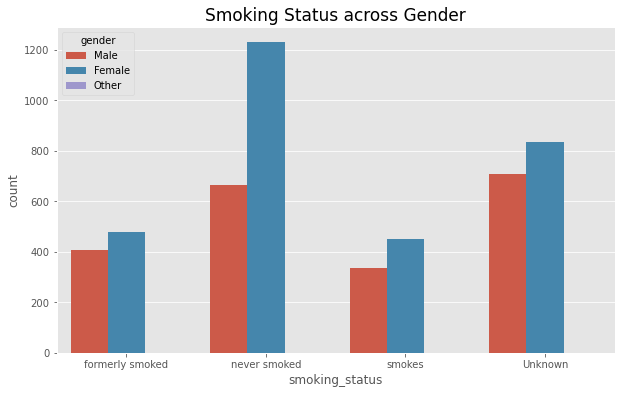

In [15]:
plt.figure(figsize = (10,6))
plt.title('Smoking Status across Gender', fontsize = 17)
sns.countplot(x = 'smoking_status', hue = 'gender', data = df)

#### A large portion of patients have not smoked in their lifetimes, majority being women.

Text(0.5, 1.0, 'Marriage Status')

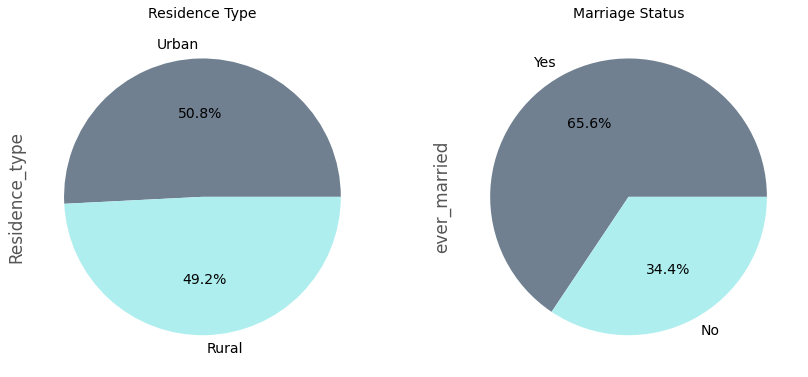

In [16]:
plt.figure(figsize = (14,14))
plt.style.use('fivethirtyeight')

plt.subplot(2,2,1)
df['Residence_type'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['slategrey','paleturquoise'])
plt.title('Residence Type', fontsize = 14)

plt.subplot(2,2,2)
df['ever_married'].value_counts().plot.pie(autopct="%1.1f%%", colors =['slategrey','paleturquoise'])
plt.title('Marriage Status', fontsize = 14)

#### Most patients live in urban areas, and are married.

Text(0.5, 1.0, 'Heart Disease')

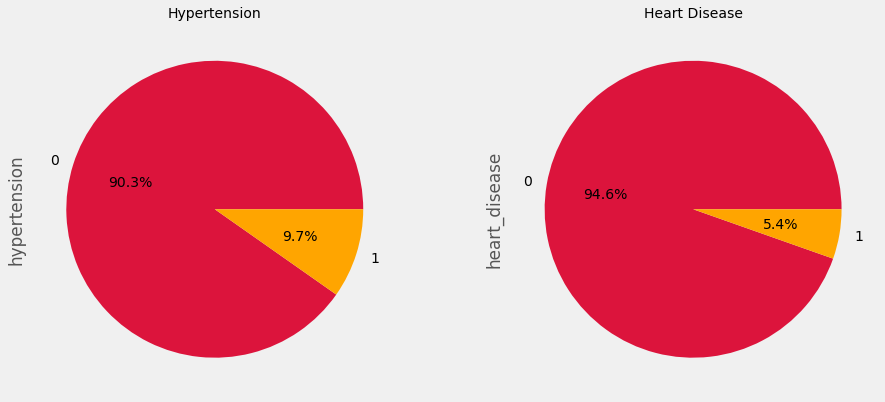

In [17]:
plt.figure(figsize = (14,14))

plt.subplot(2,2,1)
df['hypertension'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['crimson','orange'])
plt.title('Hypertension', fontsize = 14)

plt.subplot(2,2,2)
df['heart_disease'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['crimson','orange'])
plt.title('Heart Disease', fontsize = 14)


Text(6.7450000000000045, 0.5, 'Average Glucose Level')

<Figure size 1080x864 with 0 Axes>

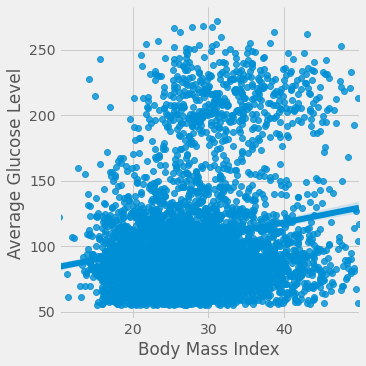

In [18]:
df = df[df['bmi']<50]
plt.figure(figsize = (15,12))
sns.lmplot(x = 'bmi', y = 'avg_glucose_level',data = df)
plt.xlabel("Body Mass Index")
plt.ylabel("Average Glucose Level")

#### It's quite hard to interpret the correlation between BMI and Glucose Levels. I don't think there's any significant correlation.

In [19]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.277152,0.258546,0.233554,0.372286,0.233940
hypertension,0.277152,1.000000,0.120316,0.176104,0.156205,0.147327
heart_disease,0.258546,0.120316,1.000000,0.159479,0.058020,0.138279
avg_glucose_level,0.233554,0.176104,0.159479,1.000000,0.180659,0.140086
bmi,0.372286,0.156205,0.058020,0.180659,1.000000,0.057524
stroke,0.233940,0.147327,0.138279,0.140086,0.057524,1.000000


#### There is an insignificant correlation between BMI and Average Glucose Levels, but age, hypertension and average glucose levels are the main causes for a stroke.

### Can't really get to much conclusions about diagnosed stroke patients with this data, so let's create a seperate dataset for diagnosed patients.

In [20]:
strokedf = df[df['stroke'] == 1]
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
strokedf.shape

(208, 11)

Female    119
Male       89
Name: gender, dtype: int64


Text(0.5, 1.0, 'Percentage of male/female stroke patients')

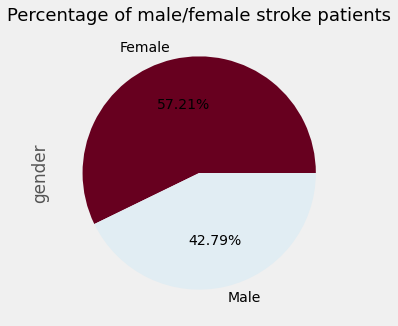

In [22]:
plt.figure(figsize = (7,5))
print(strokedf.gender.value_counts())
color = plt.cm.RdBu(np.linspace(0,5,10))
strokedf['gender'].value_counts().plot.pie(autopct = "%.2f%%", colors = color )
plt.title('Percentage of male/female stroke patients', fontsize = 18)

Text(0.5, 1.0, 'Effect of Heart Disease on stroke patients')

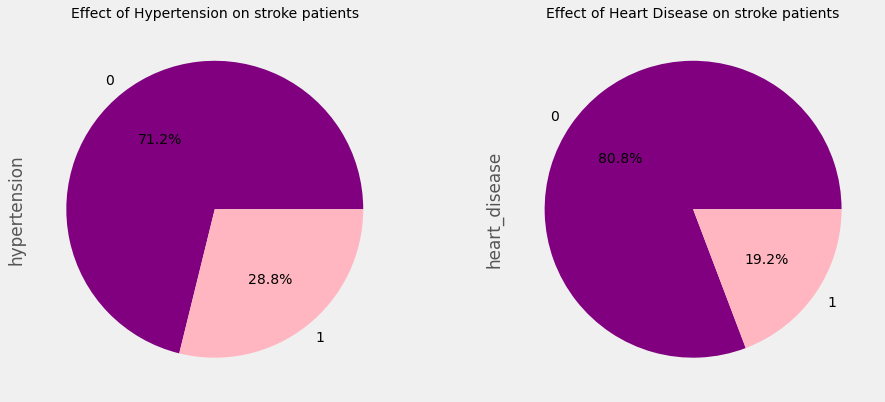

In [23]:
plt.figure(figsize = (14,14))

plt.subplot(2,2,1)
strokedf['hypertension'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['purple','lightpink'])
plt.title('Effect of Hypertension on stroke patients', fontsize = 14)

plt.subplot(2,2,2)
strokedf['heart_disease'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['purple','lightpink'])
plt.title('Effect of Heart Disease on stroke patients', fontsize = 14)

Text(0.5, 1.0, 'Effect of Marriage Status on stroke patients')

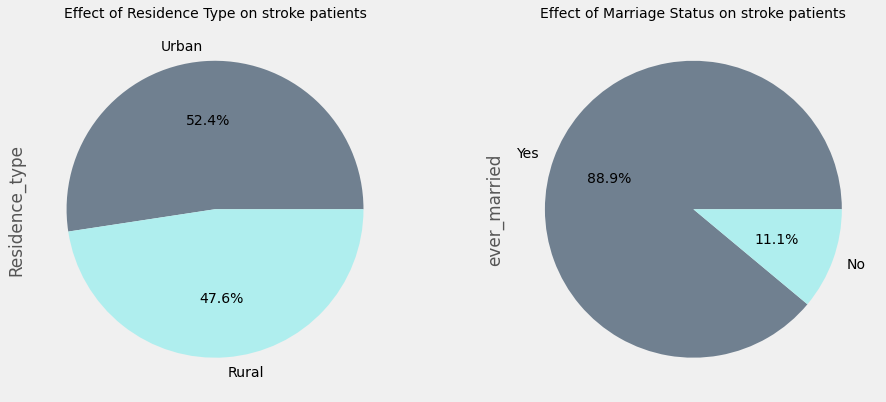

In [24]:
plt.figure(figsize = (14,14))
plt.style.use('bmh')

plt.subplot(2,2,1)
strokedf['Residence_type'].value_counts().plot.pie(autopct = "%1.1f%%", colors=['slategrey','paleturquoise'])
plt.title('Effect of Residence Type on stroke patients', fontsize = 14)

plt.subplot(2,2,2)
strokedf['ever_married'].value_counts().plot.pie(autopct="%1.1f%%", colors =['slategrey','paleturquoise'])
plt.title('Effect of Marriage Status on stroke patients', fontsize = 14)

Private          126
Self-employed     53
Govt_job          28
children           1
Name: work_type, dtype: int64


Text(0.5, 1.0, 'Employment status of stroke patients')

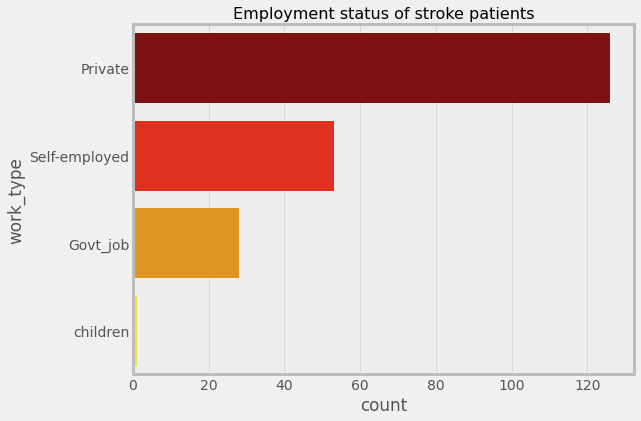

In [25]:
plt.figure(figsize = (8,6))
print(strokedf.work_type.value_counts())
sns.countplot(y = 'work_type', data = strokedf, palette = 'hot')
plt.title('Employment status of stroke patients', fontsize = 16)

<AxesSubplot:title={'center':'Effect of smoking on stroke patients across gender '}, xlabel='smoking_status', ylabel='count'>

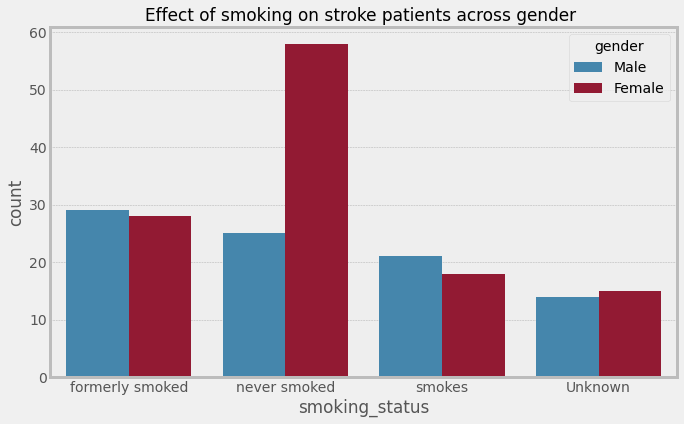

In [26]:
plt.figure(figsize = (10,6))
plt.title('Effect of smoking on stroke patients across gender ', fontsize = 17)
sns.countplot(x = 'smoking_status', hue = 'gender', data = strokedf)

#### Let's add a new column in the original dataset which will classify all the patients into 4 categories (Underweight, Normal Weight, Overweight, Obese) based on BMI

In [27]:

df['weight_category'] = 0
for i in range(len(df.index)):
    if df.iloc[i, 8] < 18.5:
        df.iloc[i, 11] = 'Underweight'
    elif df.iloc[i, 8] < 25.0 and df.iloc[i, 8] >= 18.5:
        df.iloc[i, 11] = 'Normal weight'
    elif df.iloc[i, 8] < 30.0 and df.iloc[i, 8] >= 25.0:
        df.iloc[i, 11] = 'Overweight'
    else:
        df.iloc[i, 11] = 'Obese'
        
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,weight_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight


In [28]:
strokedf = df[df['stroke'] ==1]
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,weight_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight


Text(0.5, 1.0, 'Weight Category of Stroke Patients')

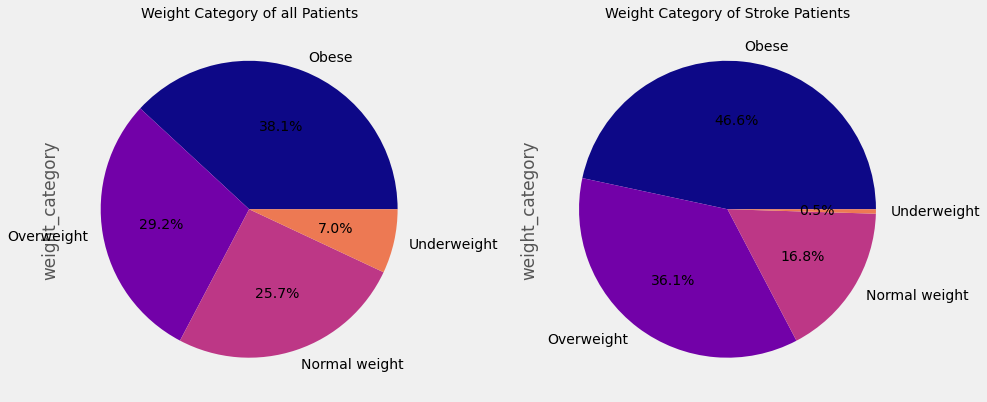

In [29]:
plt.figure(figsize = (14,14))
color = plt.cm.plasma(np.linspace(0,2,10))

plt.subplot(2,2,1)
df['weight_category'].value_counts().plot.pie(autopct = "%1.1f%%", colors = color)
plt.title('Weight Category of all Patients', fontsize = 14)

plt.subplot(2,2,2)
strokedf['weight_category'].value_counts().plot.pie(autopct="%1.1f%%", colors = color)
plt.title('Weight Category of Stroke Patients', fontsize = 14)


#### 1. Almost 93% of overall patients do not have normal weight.
#### 2. Over 80% of diagnosed stroke patients are above normal weight.

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,weight_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Average Glucose Levels')

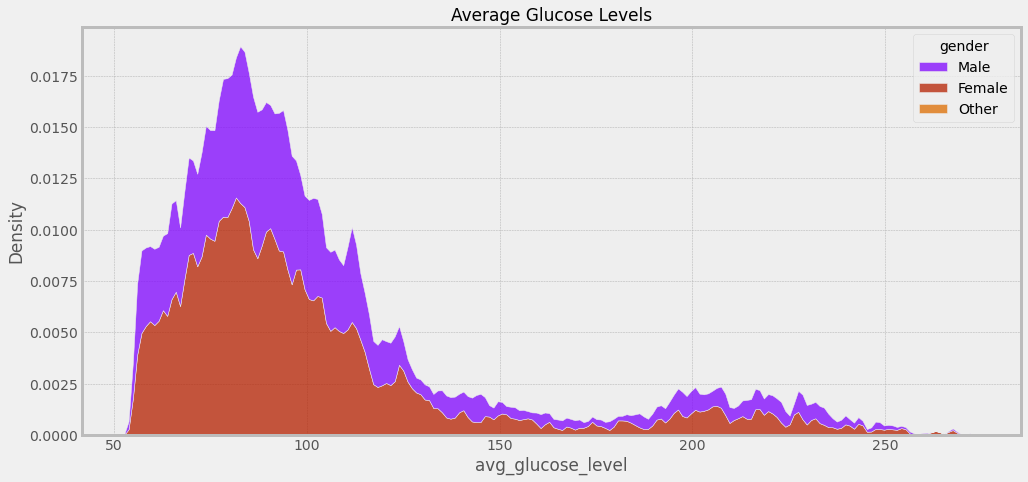

In [31]:
plt.figure(figsize = (15,7))
sns.kdeplot(data = df,  x='avg_glucose_level', bw_adjust = .1, hue = 'gender', multiple = 'stack', palette = 'gnuplot')
plt.title('Average Glucose Levels', fontsize = 17)

Text(0.5, 1.0, 'Average Glucose Levels for stroke diagnosed patients')

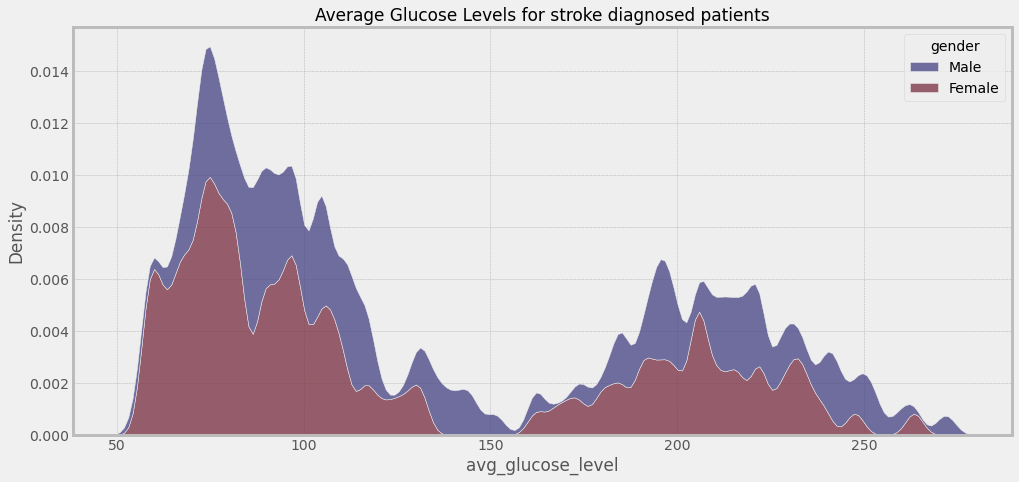

In [32]:
plt.figure(figsize = (15,7))
sns.kdeplot(data = strokedf,  x='avg_glucose_level', bw_adjust = .1, hue = 'gender', multiple = 'stack', palette = 'icefire')
plt.title('Average Glucose Levels for stroke diagnosed patients', fontsize = 17)

#### Let's create a scattergraph which shows us BMI level across ages. Since a BMI level greater than 25 is considered as overweight, let's mark that.

Text(0.5, 1.0, 'Age v/s BMI Level')

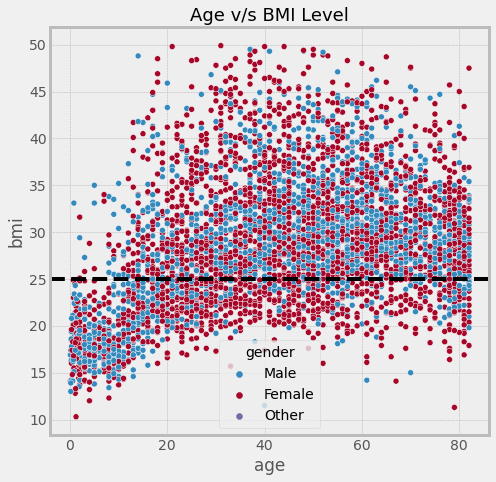

In [33]:
plt.figure(figsize = (7,7))
graph = sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'gender')
graph.axhline(y = 25, linewidth = 4, color = 'black', linestyle = 'dashed')
plt.title('Age v/s BMI Level', fontsize = 18)

#### Wow, there are so many people above the normal range of BMI!

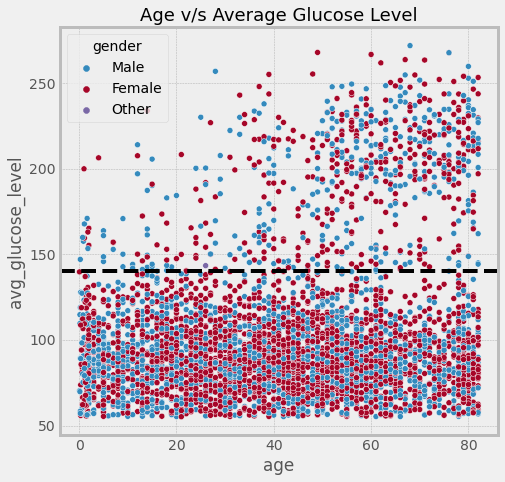

In [34]:
plt.figure(figsize = (7,7))
plt.title('Age v/s Average Glucose Level', fontsize = 18)
graph = sns.scatterplot(x = 'age', y = 'avg_glucose_level', hue = 'gender', data = df)
graph.axhline(y = 140, linewidth = 4, color = 'black', linestyle = 'dashed')

#### Okay, a small portion of people have glucose level above normal of 140, so they're prone to diabetes.

#### Let us now see the same with patients who have already had strokes before

Text(0.5, 1.0, 'Age v/s BMI Level')

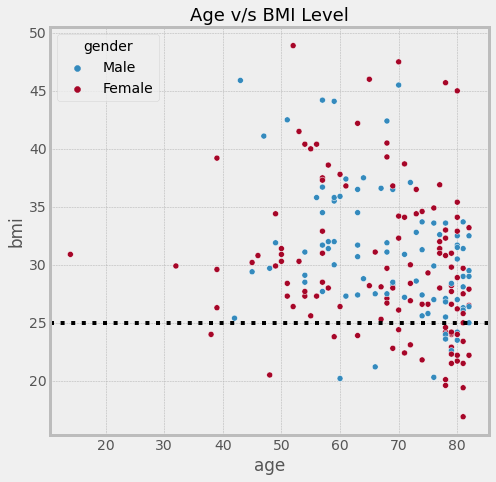

In [35]:
plt.figure(figsize = (7,7))
graph = sns.scatterplot(data = strokedf, x = 'age', y = 'bmi', hue = 'gender')
graph.axhline(y = 25, linewidth = 4, color = 'black', linestyle = 'dotted')
plt.title('Age v/s BMI Level', fontsize = 18)

#### There are so many patients whose BMI Level far exceeds the normal level!

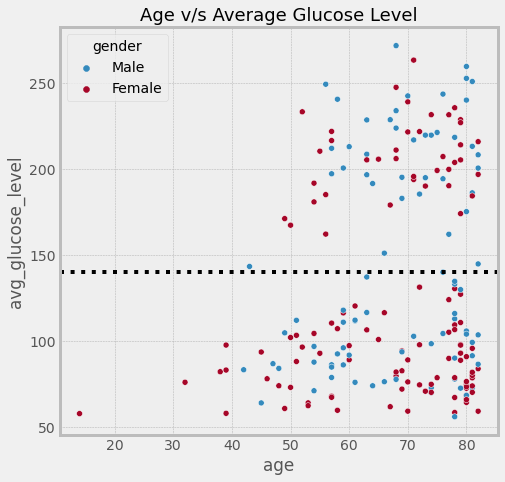

In [36]:
plt.figure(figsize = (7,7))
plt.title('Age v/s Average Glucose Level', fontsize = 18)
graph = sns.scatterplot(x = 'age', y = 'avg_glucose_level', hue = 'gender', data = strokedf)
graph.axhline(y = 140, linewidth = 4, color = 'black', linestyle = 'dotted')

#### Almost half of them have high glucose levels.

## Now, let's preprocess our data

In [37]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,weight_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese


#### Let's drop the weight category column since we used that just for EDA. Instead, we'll create a copy of our dataset so we can reuse our original dataset for more EDA if needed. So, let's not use that as a feature for our model.

In [38]:
data = df.copy()
data.drop('weight_category', axis =1, inplace = True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [39]:
encoder = LabelEncoder()

column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in column:
    data[i] = encoder.fit_transform(data[i])

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


#### Since the dataset is highly imbalanced, let's duplicate the records of those who have already suffered a stroke so that we can balance the dataset.
#### We will use the resample method to do so.

In [40]:
from sklearn.utils import resample
majority = data[data['stroke'] == 0]
minority = data[data['stroke'] == 1]

upsampled = resample(minority, replace=True, n_samples=len(majority))
upsampled.stroke.value_counts()

1    4622
Name: stroke, dtype: int64

#### So, now we have equal number of records of those who have already suffered a stroke.
#### We will concat those records with our remaining records to form our balanced dataset. We need to shuffle them as well.

In [41]:
strokedata = pd.concat([majority,upsampled])
strokedata = strokedata.sample(frac=1).reset_index(drop=True)
strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,20.0,0,0,0,2,0,184.25,27.5,2,0
1,1,50.0,0,0,1,0,1,88.24,32.6,0,0
2,1,54.0,0,0,1,0,0,216.19,30.3,1,0
3,1,79.0,0,1,1,2,0,129.98,22.6,1,1
4,0,60.0,0,0,1,2,1,97.43,26.4,3,1


In [42]:
X = strokedata.drop(['stroke'], axis = 1)
y = strokedata['stroke']

models = pd.DataFrame()

In [45]:
def trainandtest(X,y,name,algorithm):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    minmax = MinMaxScaler().fit(X_train)
    
    X_train = minmax.transform(X_train)
    X_test = minmax.transform(X_test)
    
    model = algorithm
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    
    score = round((accuracy_score(y_test, predict)*100),2)
    print("\nModel Score: ", score, "%")
    print("Precision: ", precision_score(y_test,predict))
    print("Recall: ", recall_score(y_test, predict))
    print("F1 Score: ", f1_score(y_test, predict))
    print("ROC-AUC Score: ", roc_auc_score(y_test, predict))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
    print("-------------------------------------------------------")
    print()
    
    model = {}
    
    model['Algorithm'] = name
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, predict), 2)
    model['Recall'] = round(recall_score(y_test, predict), 2)
    model['F1 Score'] = round(f1_score(y_test, predict), 2)
    model['ROC-AUC Score'] = round(roc_auc_score(y_test, predict), 2)
    return model
    
    

In [46]:
algorithms = {"Logistic Regression": LogisticRegression(), "Decision Tree" : DecisionTreeClassifier(),"Random Forest" : RandomForestClassifier(), "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors = 3), "Support Vector Classifier": SVC()}

for i,j in algorithms.items():
    print("Algorithm Performed: {}".format(i))
    model = trainandtest(X,y,i,j)
    models = models.append(model,ignore_index=True)
    
    

Algorithm Performed: Logistic Regression

Model Score:  78.12 %
Precision:  0.7761092150170649
Recall:  0.8029661016949152
F1 Score:  0.7893092676154112
ROC-AUC Score:  0.7807172187414193
Confusion Matrix:
 [[1030  328]
 [ 279 1137]]
-------------------------------------------------------

Algorithm Performed: Decision Tree

Model Score:  97.33 %
Precision:  0.9501347708894878
Recall:  1.0
F1 Score:  0.9744298548721493
ROC-AUC Score:  0.9728739002932552
Confusion Matrix:
 [[1290   74]
 [   0 1410]]
-------------------------------------------------------

Algorithm Performed: Random Forest

Model Score:  99.32 %
Precision:  0.9865819209039548
Recall:  1.0
F1 Score:  0.9932456452186278
ROC-AUC Score:  0.9931009440813363
Confusion Matrix:
 [[1358   19]
 [   0 1397]]
-------------------------------------------------------

Algorithm Performed: K-Nearest Neighbours

Model Score:  94.38 %
Precision:  0.8985695708712613
Recall:  1.0
F1 Score:  0.9465753424657534
ROC-AUC Score:  0.943965517241

In [47]:
models.sort_values(by = 'F1 Score', ascending = False)

,Algorithm,F1 Score,Model Score,Precision,ROC-AUC Score,Recall
2,Random Forest,0.99,99.32%,0.99,0.99,1.00
1,Decision Tree,0.97,97.33%,0.95,0.97,1.00
3,K-Nearest Neighbours,0.95,94.38%,0.90,0.94,1.00
4,Support Vector Classifier,0.82,80.25%,0.78,0.80,0.86
0,Logistic Regression,0.79,78.12%,0.78,0.78,0.80


### Random Forest yields the best score, and so is the best model.